In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [21]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [19]:
df.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [23]:
datachange = df.drop_duplicates()

### 중복된 행을 제거할 것인가?
중복된 내용은 보통 데이터 전처리 작업에서 일반적으로 제거를 한다. 중복된 행을 그대로 두면 기존 데이터의 분포는 달라지지 않으나 KNN모델에 적용될 때 중복된 데이터에 대해서는 의도치 않은 가중치가 적용될 수 있다. 반대로 중복된 행을 제거하면 기존 데이터의 분포는 달라지나 KNN 모델에 적용할 때 큰 문제는 없다. 팀원들과 상의하였을 때 중복된 행을 그대로 두었을 때와 제거했을 때의 데이터 분포가 많이 달라지만 중복된 행을 그대로 두고 큰 변화가 없다면 제거하기로 하였다. 다음은 제거하기 전과 후의 상자그림을 그린 것이다.

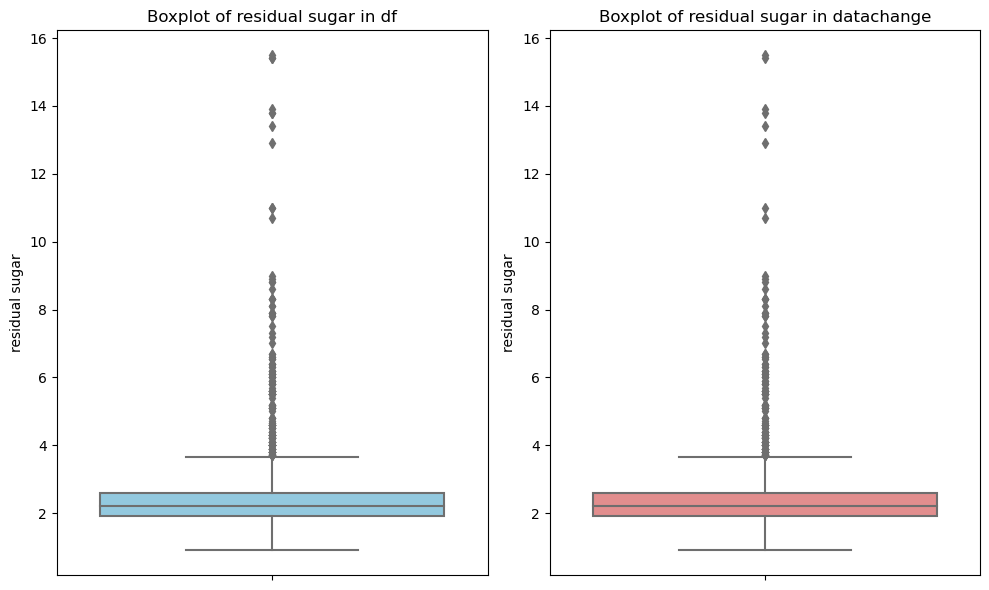

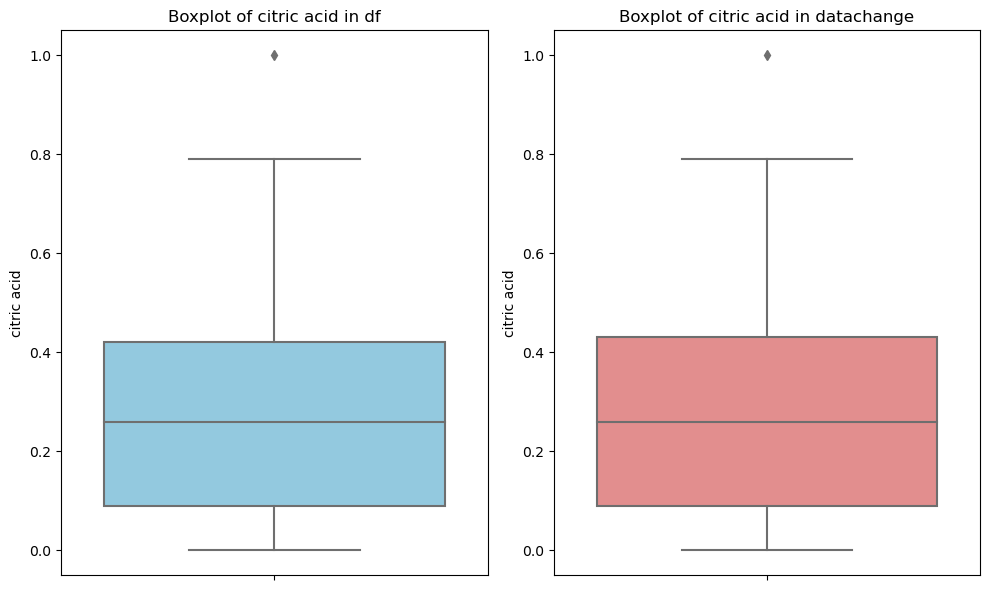

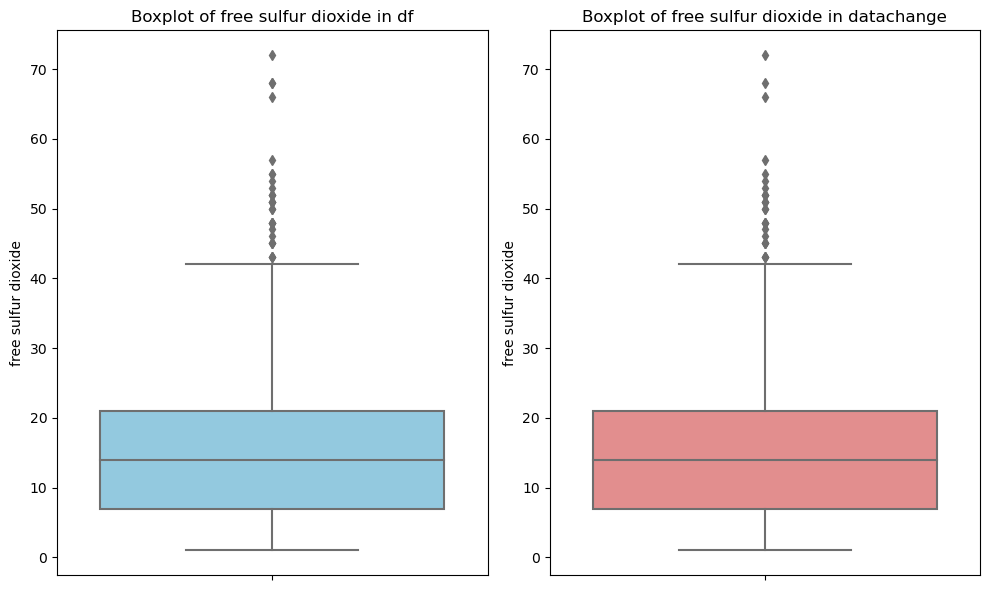

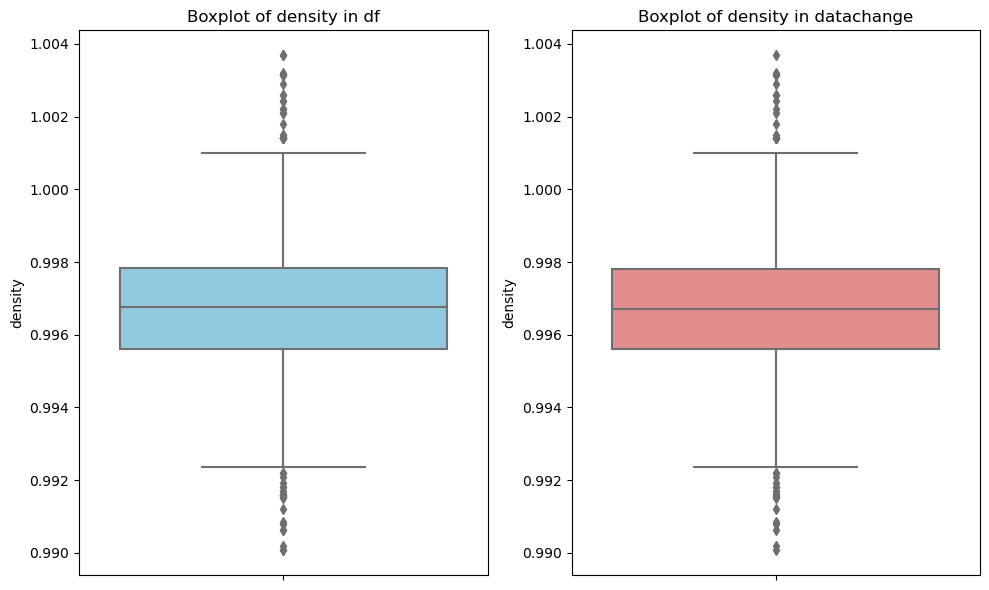

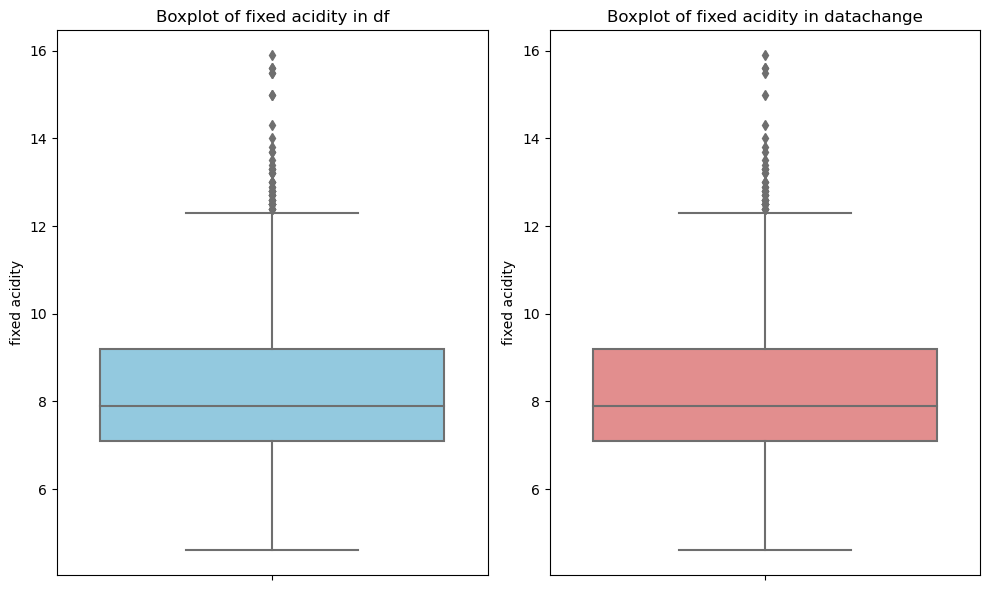

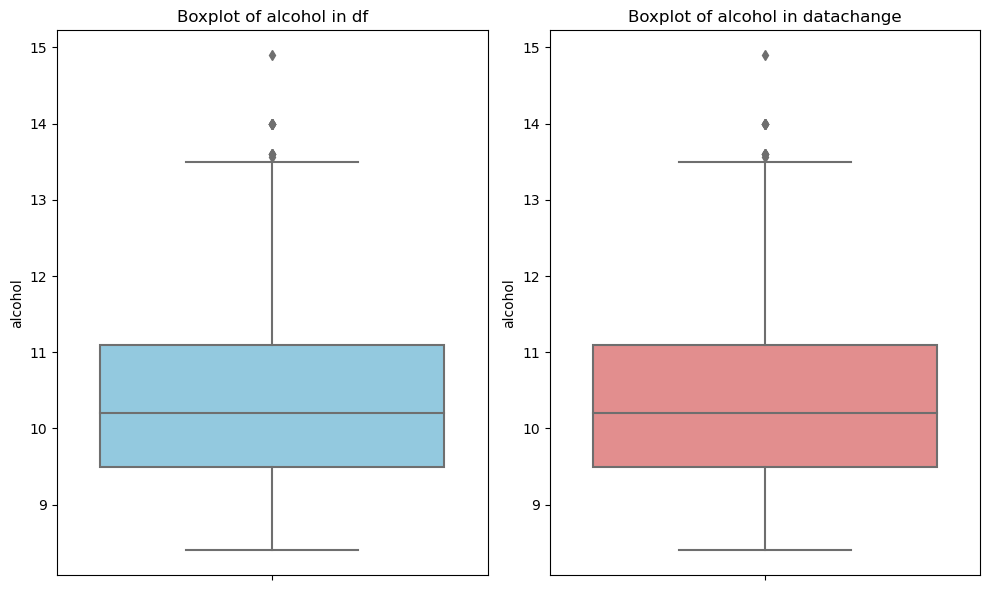

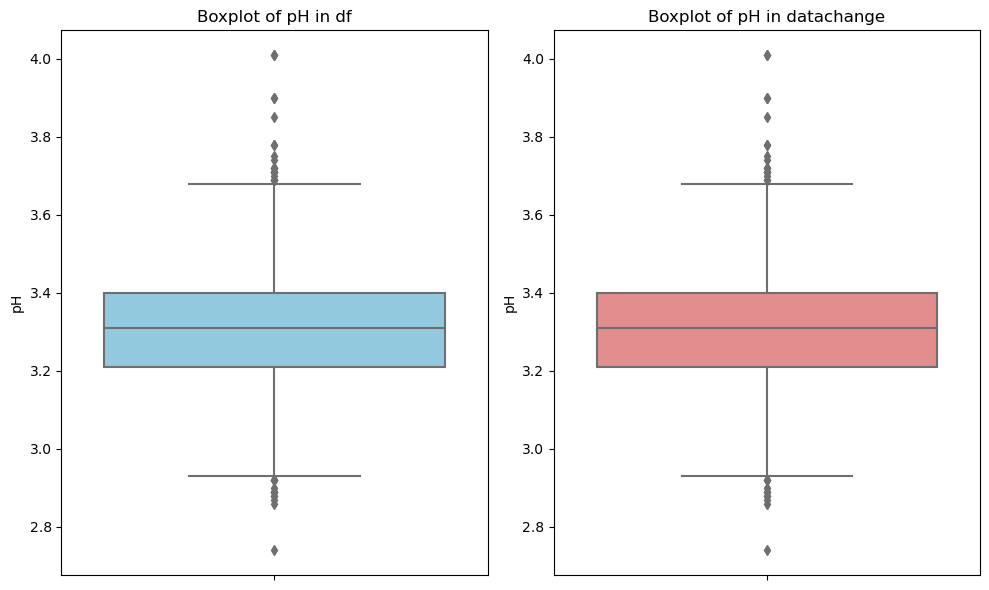

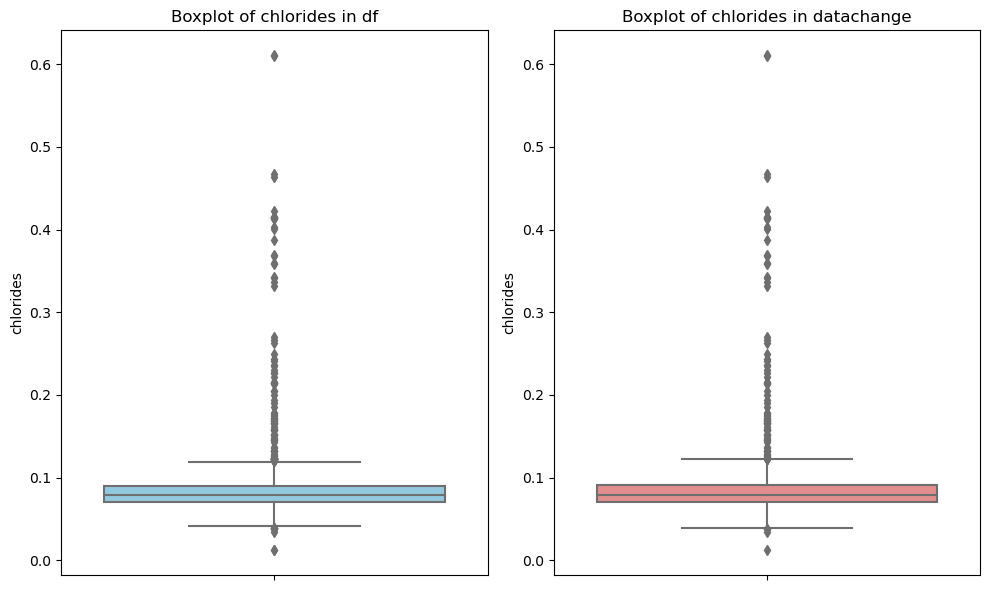

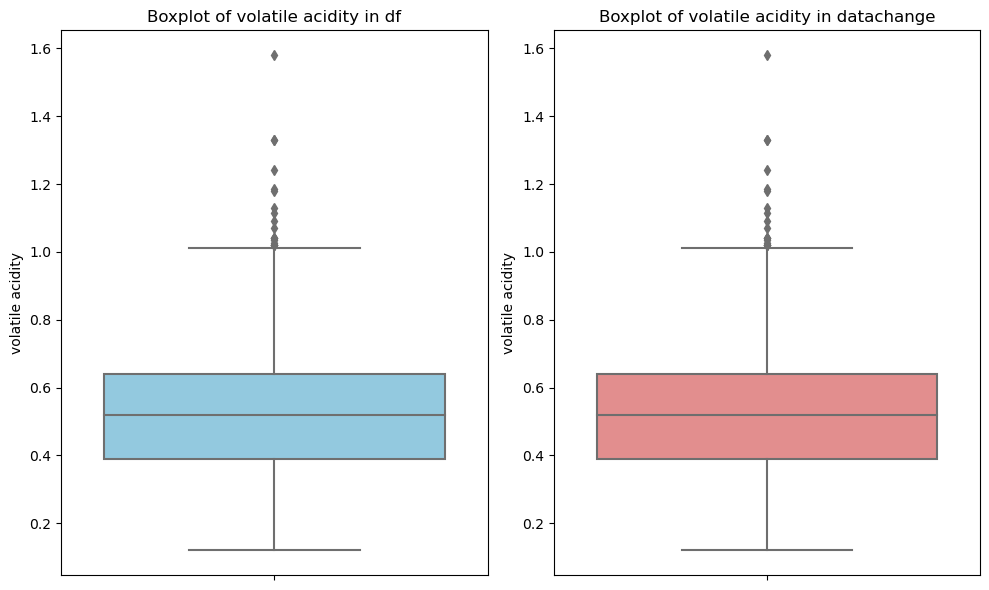

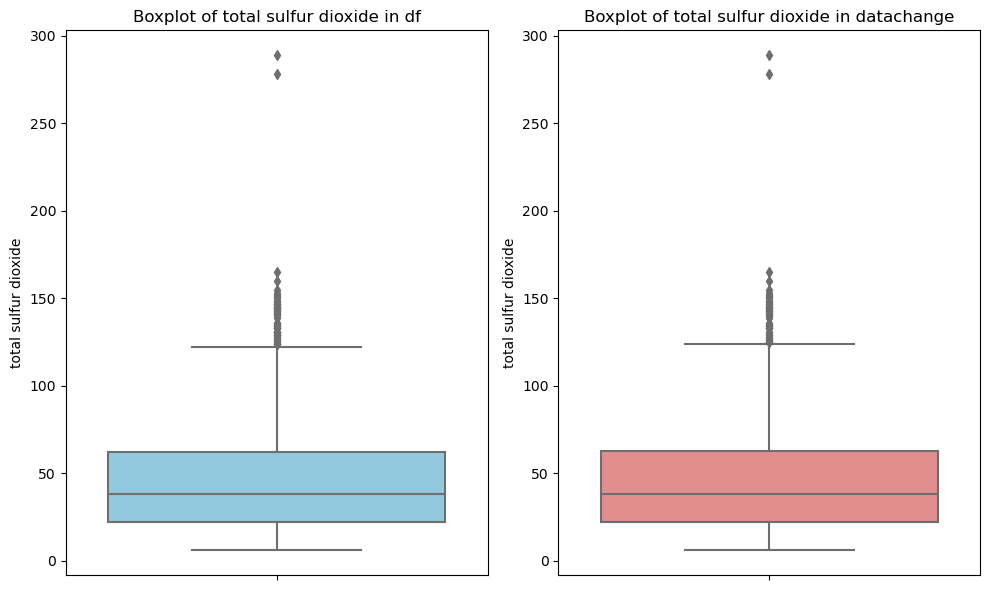

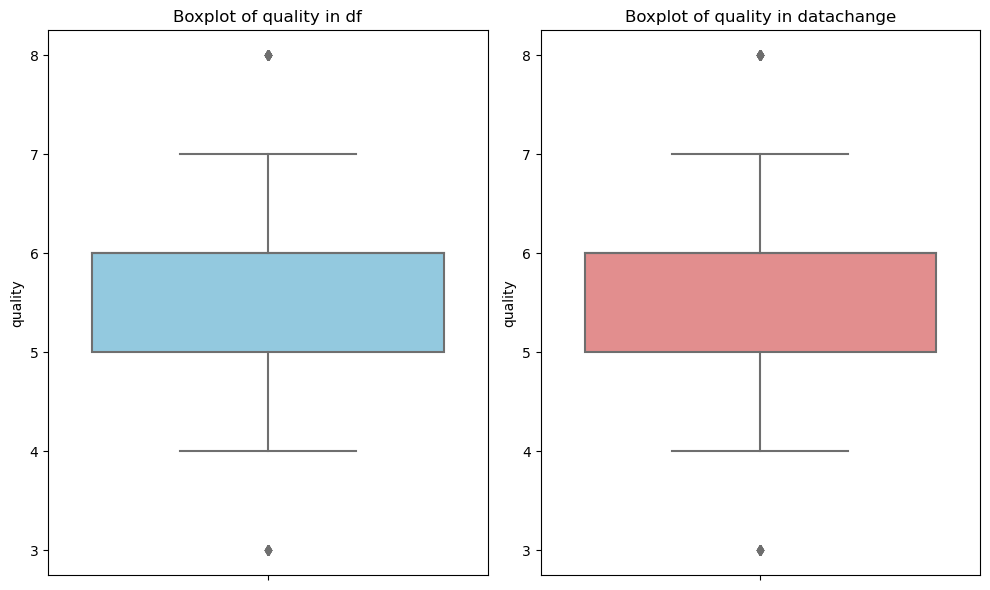

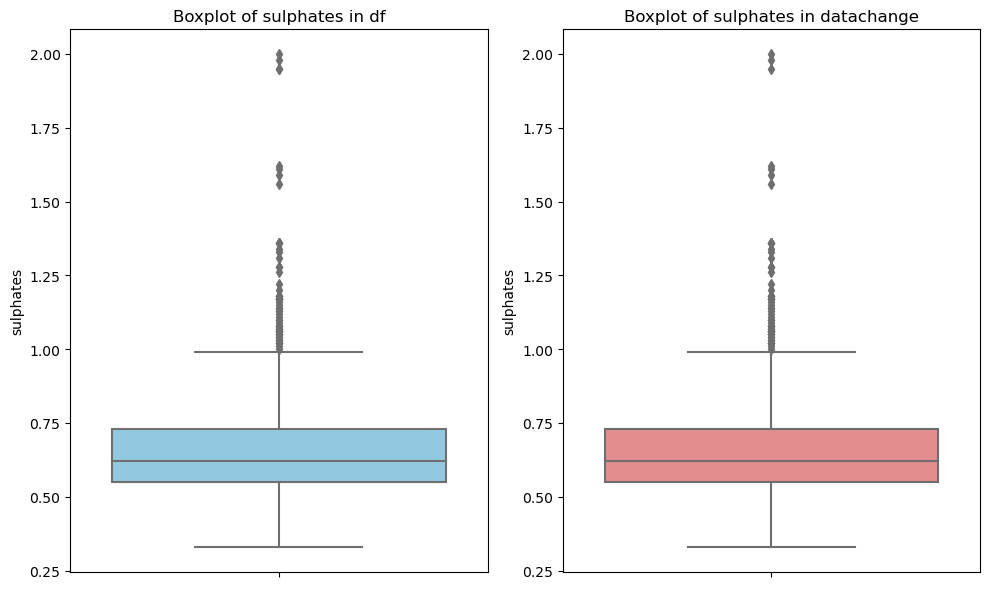

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 두 데이터프레임의 동일한 열 추출
common_columns = set(df.columns) & set(datachange.columns)

# 열에 대한 반복문
for column_name in common_columns:
    # 데이터프레임에서 열 선택
    data1_column = df[column_name]
    data2_column = datachange[column_name]

    # 상자그림 비교
    plt.figure(figsize=(10, 6))
    
    # 첫 번째 데이터프레임의 상자그림
    plt.subplot(1, 2, 1)
    sns.boxplot(y=data1_column, color='skyblue')
    plt.title('Boxplot of {} in df'.format(column_name))

    # 두 번째 데이터프레임의 상자그림
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data2_column, color='lightcoral')
    plt.title('Boxplot of {} in datachange'.format(column_name))

    # 전체 플롯의 레이아웃 조정
    plt.tight_layout()
    
    # 플롯 보이기
    plt.show()

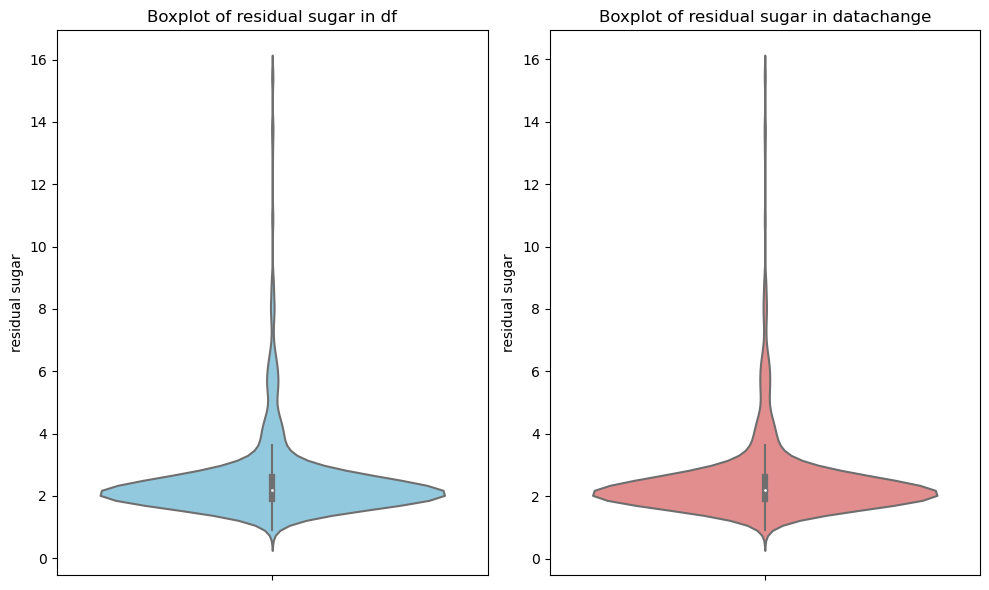

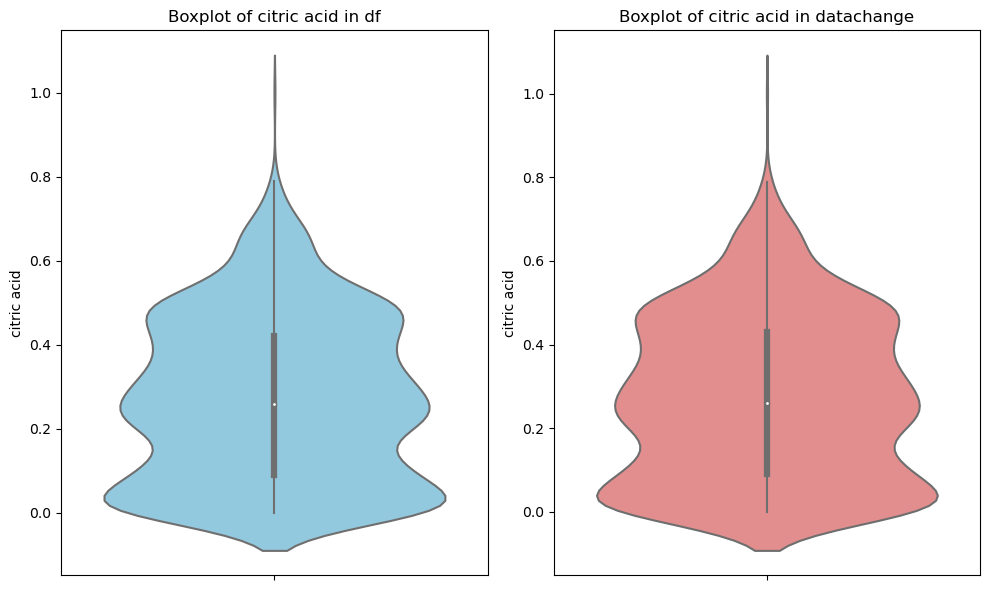

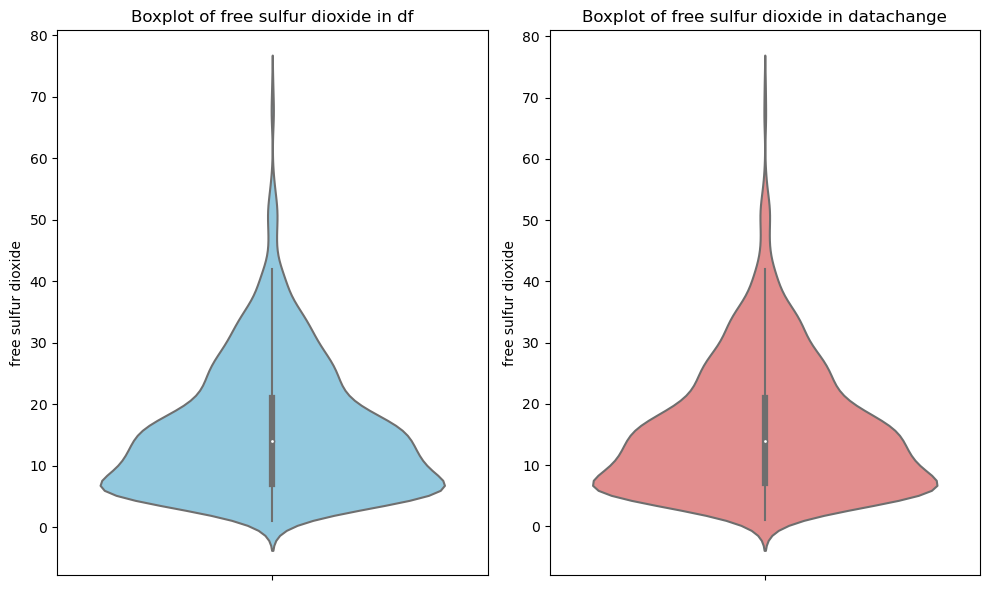

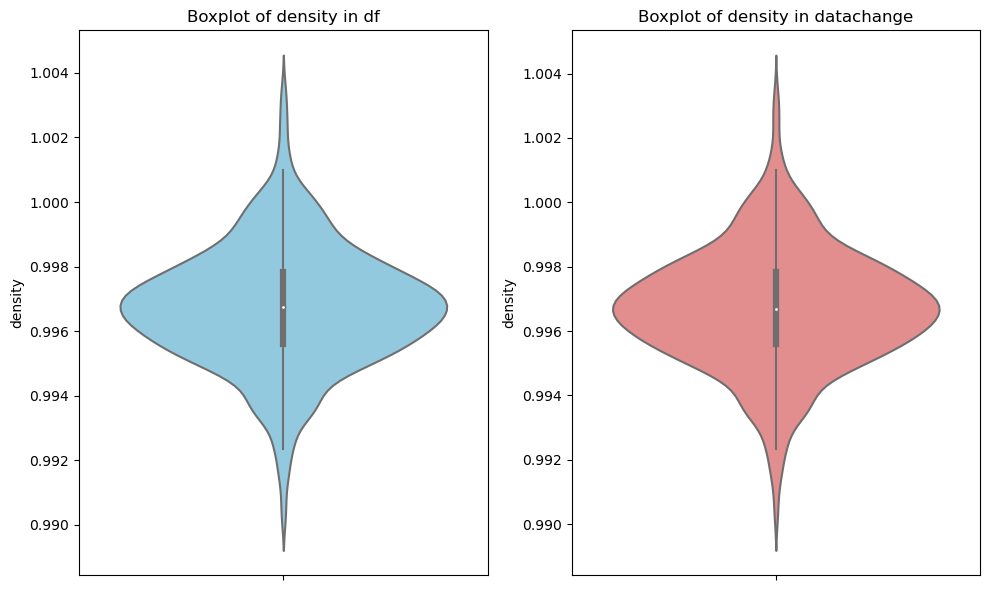

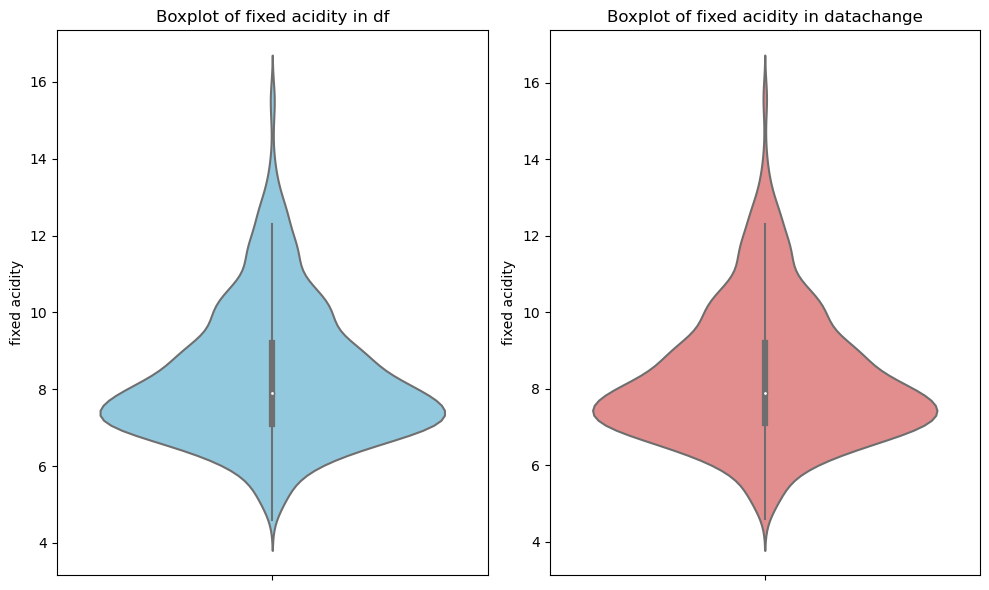

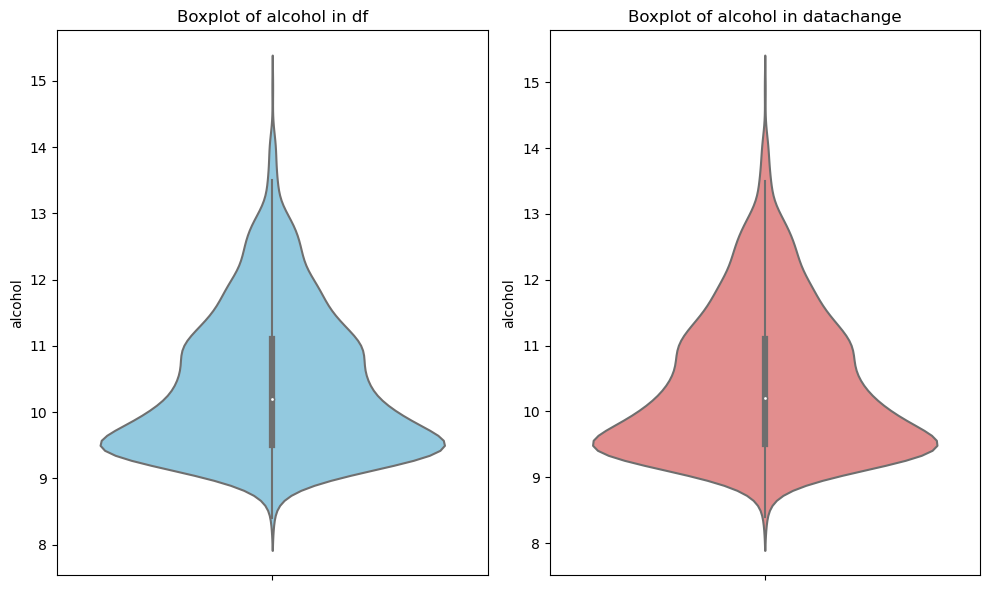

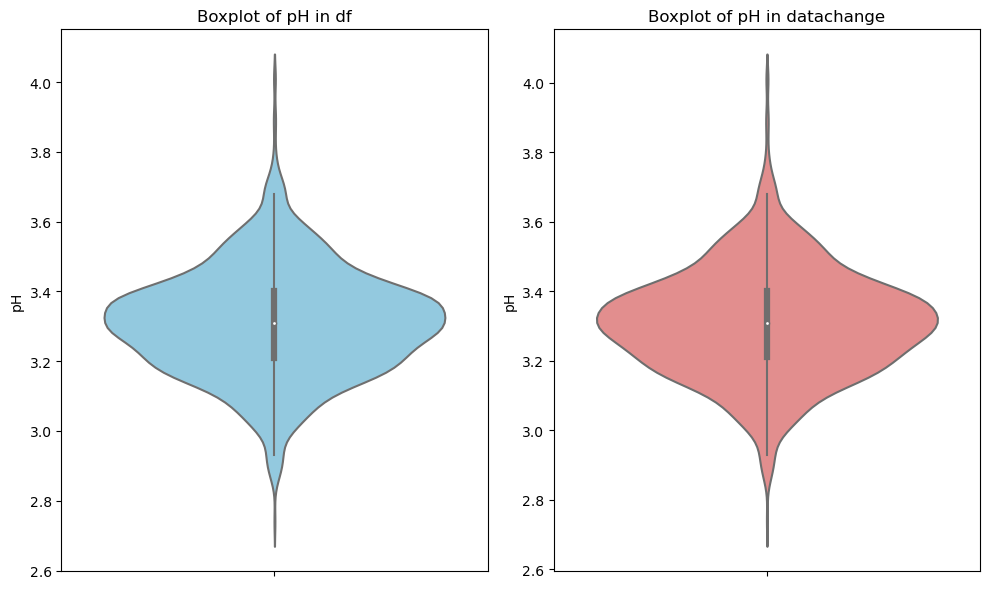

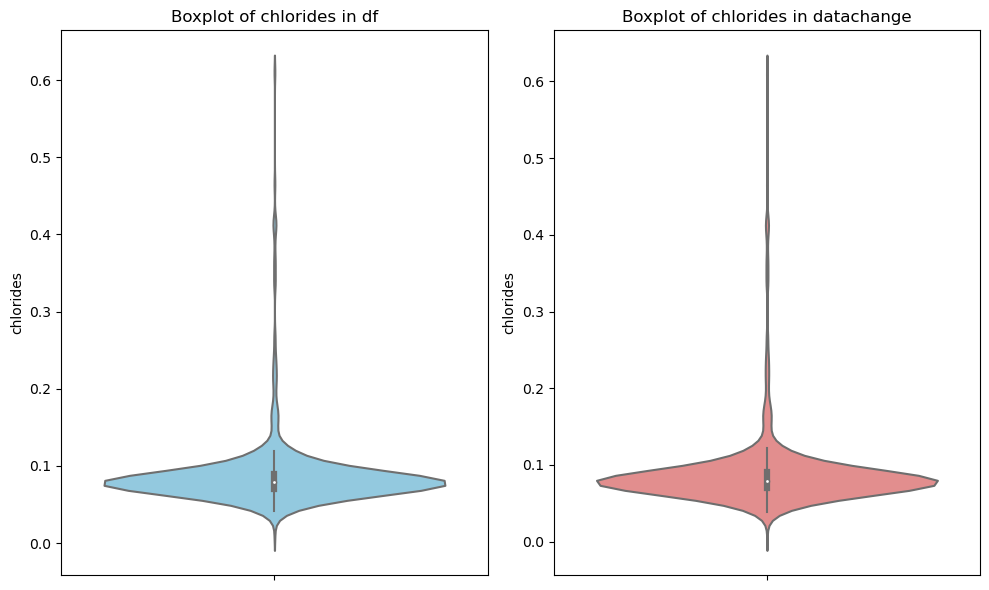

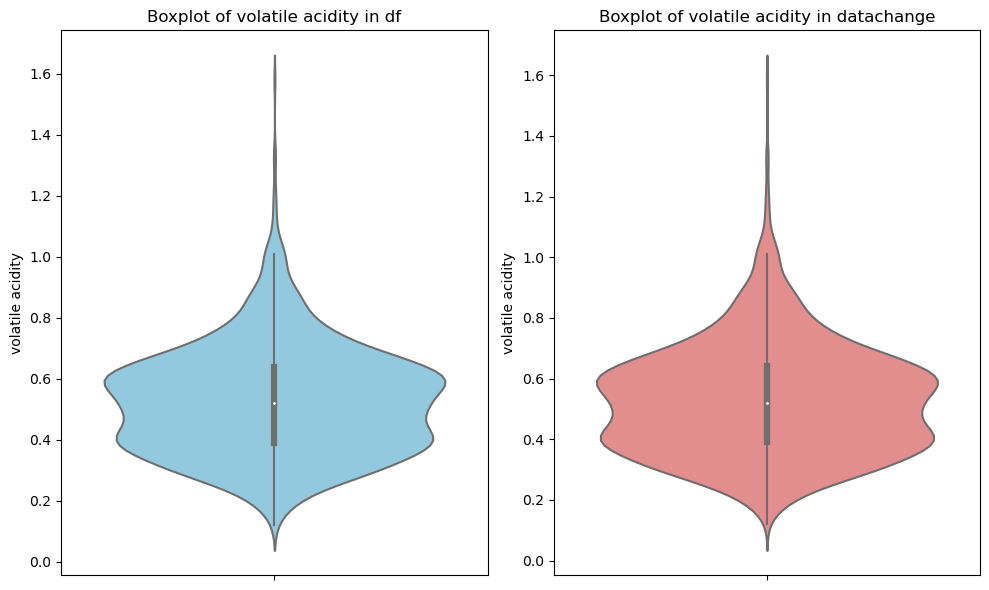

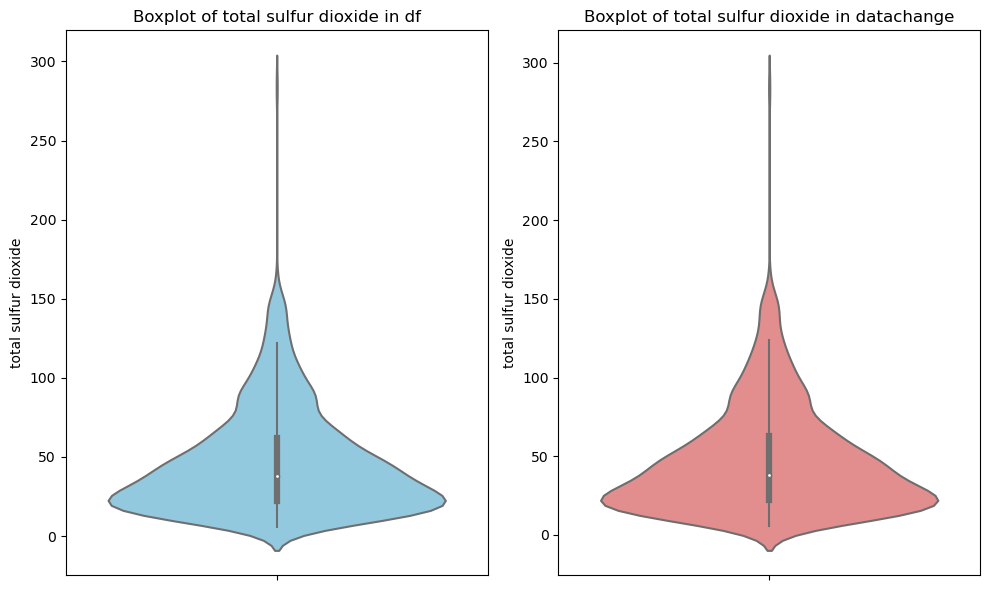

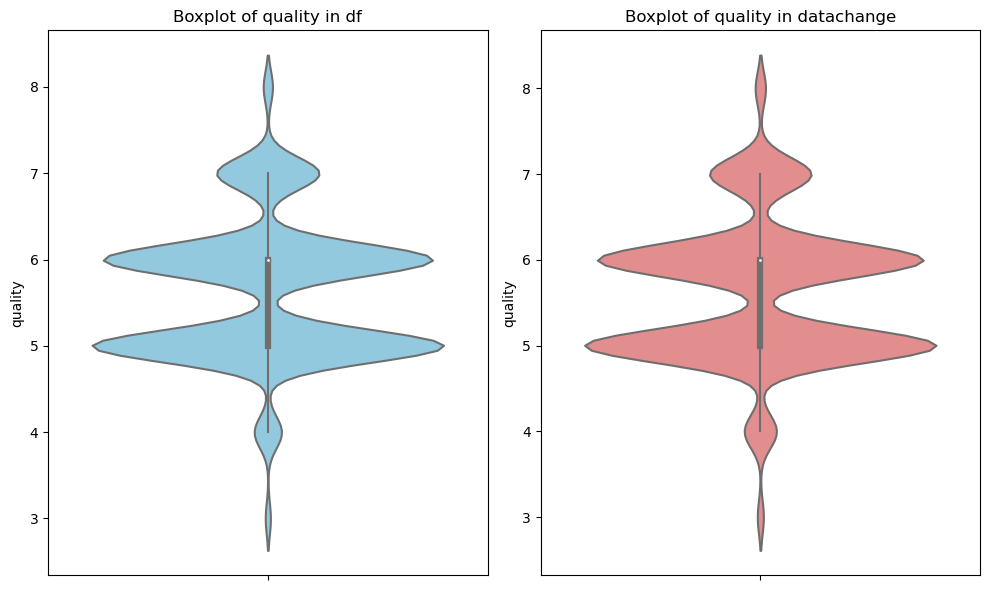

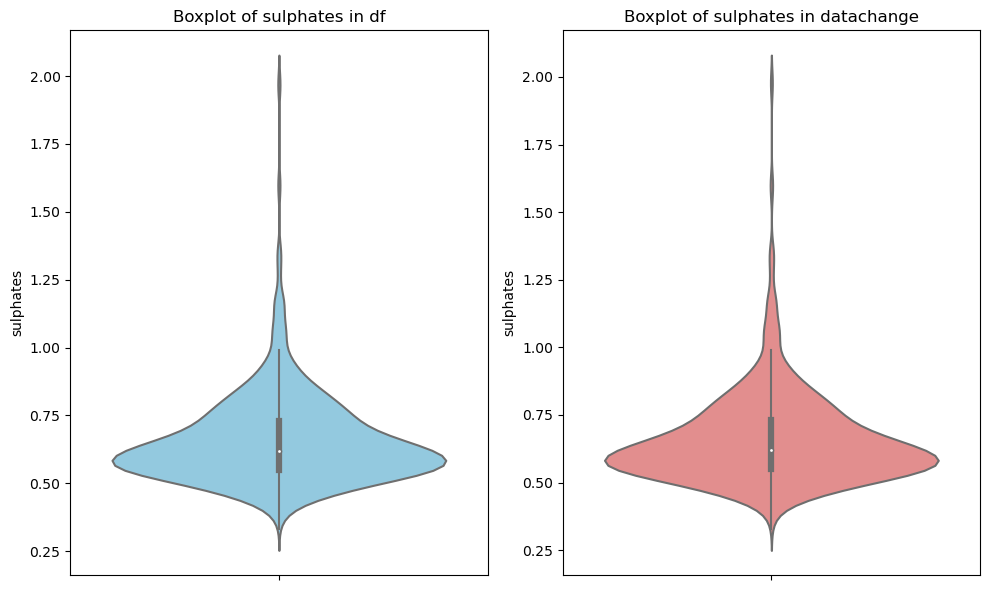

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 두 데이터프레임의 동일한 열 추출
common_columns = set(df.columns) & set(datachange.columns)

# 열에 대한 반복문
for column_name in common_columns:
    # 데이터프레임에서 열 선택
    data1_column = df[column_name]
    data2_column = datachange[column_name]

    # 상자그림 비교
    plt.figure(figsize=(10, 6))
    
    # 첫 번째 데이터프레임의 상자그림
    plt.subplot(1, 2, 1)
    sns.violinplot(y=data1_column, color='skyblue')
    plt.title('Boxplot of {} in df'.format(column_name))

    # 두 번째 데이터프레임의 상자그림
    plt.subplot(1, 2, 2)
    sns.violinplot(y=data2_column, color='lightcoral')
    plt.title('Boxplot of {} in datachange'.format(column_name))

    # 전체 플롯의 레이아웃 조정
    plt.tight_layout()
    
    # 플롯 보이기
    plt.show()